In [1]:
import pandas as pd

df = pd.read_csv("../data/social_list.csv")
df = df.rename(columns=df.ix[1])
df = df.drop([0, 1, 2]).reset_index(drop=True)
# df.fillna("")
df.tail()

,지역,인증번호,기관명,사업내용,사회적목적 실현유형,사회서비스분야,대표자,대표전화번호,팩스,소재지,홈페이지,인증일자,인증회차
1708,인천,제2016-260호,주식회사 인천개항,"일반음식점, 관광기념품, 체험",일자리제공형,기타,김익수,070-4243-4672,032-762-0607,"인천광역시 중구 신포로27번길 97, 1층(중앙동1가)",café.naver.com/lovedreamguest,12/27/16,2016년 6차
1709,인천,제2016-261호,커피위드인사회적협동조합,"커피, 잡화",일자리제공형,기타,김도균,032-506-4561,032-531-4569,"인천광역시 부평구 부평대로 168, 1층(부평동, 부평구청 본청동 1층로비)...",NaN,12/27/16,2016년 6차
1710,전북,제2016-262호,사단법인 창의예술연구회,"교구, 교재, 서적, 교육사업(방과후위탁사업)",사회서비스제공형,교육,진정화,063-277-7405,063-277-7406,전라북도 전주시 완산구 전룡로 73(서신동),café.daum.net/cjangeuiart,12/27/16,2016년 6차
1711,전북,제2016-263호,소리지존퓨전타악퍼포먼스,"공연, 공연장비, 믄화예술교육",기타형,문화예술,이미정,063-222-1798,063-222-1798,전라북도 전주시 완산구 삼천동1가 585-10 세창짜임아파트 지하 102호동...,sorijijon.com,12/27/16,2016년 6차
1712,제주,제주특별자치도 제2016-002호,사회적협동조합 희망나래,"디자인, 출판업, 인쇄업, 화훼, 판촉물, 잡화",혼합형,사회복지,최영열,064-751-5152,064-751-5153,"제주특별자치도 제주시 중앙로 248, 4층(이도이동, 아산빌딩)...",www.coophn.co.kr,12/27/16,2016년 6차


In [2]:
from os import path
from wordcloud import WordCloud

In [3]:
text = df.사업내용.values
text

array(['간병사업, 평생교육시설 운영, 기타 교육지원 서비스업, 정기간행물 및 신문발행업', '재활용품 수거 판매',
       '중증장애인이동지원, 건강상담, 가사지원', ..., '교구, 교재, 서적, 교육사업(방과후위탁사업)',
       '공연, 공연장비, 믄화예술교육', '디자인, 출판업, 인쇄업, 화훼, 판촉물, 잡화'], dtype=object)

In [4]:
text_string = ", ".join(text)
text_string

'간병사업, 평생교육시설 운영, 기타 교육지원 서비스업, 정기간행물 및 신문발행업, 재활용품 수거 판매, 중증장애인이동지원, 건강상담, 가사지원, 가사간병지원, 차량이동, 생활지원 , 정신지체장애인 우리밀 쿠키생산, 간병, 재가도우미, 장애아동통합지원센터, 재가복지, 간병, 장애아동 재가보육, 의원, 한의원, 노인재가요양, 재활용품 수거, 선별, 가공, 가사간병, 산모신생아도우미, 나눔가게, 집수리, 방문요양 등, 공공기관 위생관리용역, 외벽청소 등 특수청소, 시설경비 및 근로자파견업, 청소교육 및 사회적기업컨설팅, 취업지원사업, 칫솔제조, 판매 등, 모자, 의류, 자수 및 프린터 재생카트리지 생산, 생태주의 뮤직퍼포먼스, 공연, 워크샵, 행정봉투, 장갑 생산, 의류(조끼, 환자복 등), 카드/명함/달력 등 생산, 폐기물 재활용, 외국인노동자 진료, 이동스팀세차, 재활용, 벽돌제조, 전기전자폐기물 재활용사업, 폐OA수거,분해,판매, 디자인, 출판, 복사용지, 직업재활, 보호고용훈련 , 문화예술교육, 연해주고려인동포지원, 청국장판매, 역사, 문화교실, 프린터 리본/재생카트리지 생산, 비비크림, 미용비누, 손세정제, 핸드크림 등 생산, 도시락, 단체급식, 출장뷔페, 건물종합관리, 경비 청소 용역, 깨끗한 학교만들기, 청소, 노인, 치매환자 요양, 도시락, 미용 창업스쿨, 재가노인 이미용 케어, 마을발전 및 도농교류 컨설팅, 저소득아동 방과후 교육, 폐기물 수거 재활용, 지역사회 보건의료 서비스(의원,한의원,치과), 폐기물 수거 재활용, 전통문화체험, 한옥생태관광 희망농촌만들기 등 문화관광사업, 소외계층 진료, 가사간병서비스 , 재활용품 수거, 판매, 친환경농산물생산, 장애인 티슈, 위생자 가공, 판매, 친환경버거,세제 생산 등 로컬 푸드운동, 장애인 택시운전, 면장갑제조 및 소프트웨어 개발, 양초, 화장지, 문서화일 생산판매, 장애인 부품조립, 가공, 청소, 경비, 인쇄출판 및 제조업, 취약계층(고령자)쿠키제조 및 판매, 결식아동 도시락 제공, 노인돌보미, 푸드뱅

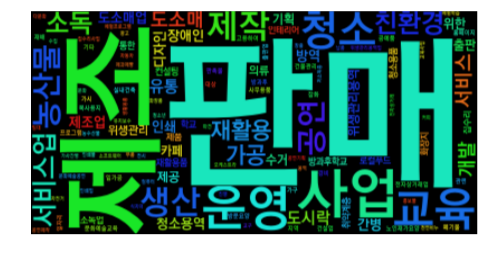

In [5]:
import matplotlib.pylab as plt

wc = WordCloud(font_path="/Users/jkpark/Library/Fonts/THEmpgt/THEmpgtB.otf",
                      max_words=400, min_font_size=4, stopwords=None, 
                      random_state=None, background_color='black', max_font_size=150,
                      ).generate(text_string)
plt.imshow(wc)
plt.axis("off")
plt.show()

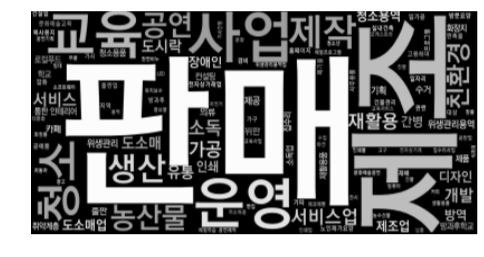

In [6]:
import matplotlib.pylab as plt

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)


wc = WordCloud(font_path="/Users/jkpark/Library/Fonts/THEmpgt/THEmpgtB.otf",
                      max_words=400, min_font_size=4, stopwords=None, 
                      random_state=None, background_color='black', max_font_size=150,
                      ).generate(text_string)

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.axis("off")
plt.show()

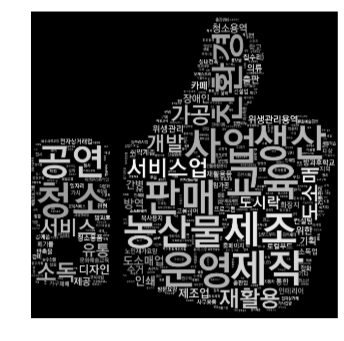

In [7]:
from PIL import Image
import matplotlib.pylab as plt

thumb_mask = np.array(Image.open("./thumb.jpg"))

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)


wc = WordCloud(font_path="/Users/jkpark/Library/Fonts/THEmpgt/THEmpgtB.otf",
                      max_words=400, min_font_size=4, stopwords=None, mask=thumb_mask,
                      random_state=None, background_color='black', max_font_size=80,
                      ).generate(text_string)

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.axis("off")
plt.show()

In [8]:
# wc.to_file("./social5.png")